# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json as json

# Import API key
from api_key import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "weather_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Get Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": -73.83,
        "lat": -41.87
    },
    "weather": [
        {
            "id": 801,
            "main": "Clouds",
            "description": "few clouds",
            "icon": "02n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 44.6,
        "pressure": 1016,
        "humidity": 87,
        "temp_min": 44.6,
        "temp_max": 44.6
    },
    "visibility": 3300,
    "wind": {
        "speed": 5.82,
        "deg": 310
    },
    "clouds": {
        "all": 20
    },
    "dt": 1559866431,
    "sys": {
        "type": 1,
        "id": 8512,
        "message": 0.0049,
        "country": "CL",
        "sunrise": 1559823405,
        "sunset": 1559856688
    },
    "timezone": -14400,
    "id": 3899695,
    "name": "Ancud",
    "cod": 200
}


In [4]:
print(requests.get(query_url + city))

<Response [200]>


In [5]:
# Set Up Lists to Hold Reponse Info
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Mogadishu
Processing Record 2 | Mar del Plata
City not found. Skipping...
Processing Record 3 | Yellowknife
Processing Record 4 | Batemans Bay
Processing Record 5 | Punta Arenas
Processing Record 6 | Houma
Processing Record 7 | Kirakira
City not found. Skipping...
Processing Record 8 | Ushuaia
City not found. Skipping...
Processing Record 9 | Georgetown
Processing Record 10 | Gazojak
Processing Record 11 | Tuatapere
City not found. Skipping...
Processing Record 12 | Grand Gaube
Processing Record 13 | Albany
Processing Record 14 | Faanui
Processing Record 15 | Yekimovichi
Processing Record 16 | Sinnamary
Processing Record 17 | Mataura
Processing Record 18 | Busselton
Processing Record 19 | Chuy
Processing Record 20 | Chokurdakh
Processing Record 21 | Meulaboh
Processing Record 22 | Zavitinsk
Processing Record 23 | Swedru
Processing Record 24 | Abu Samrah
Processing Record 25 | Castro
Processing Record 26 | Ca

City not found. Skipping...
City not found. Skipping...
Processing Record 226 | College
Processing Record 227 | Honningsvag
Processing Record 228 | Basco
Processing Record 229 | Port Hedland
Processing Record 230 | La Libertad
Processing Record 231 | San Cristobal
Processing Record 232 | San Luis
Processing Record 233 | Guerrero Negro
Processing Record 234 | Cabo San Lucas
Processing Record 235 | Jackville
Processing Record 236 | Mackenzie
Processing Record 237 | Nizhniy Tsasuchey
City not found. Skipping...
Processing Record 238 | Leh
Processing Record 239 | Calabozo
Processing Record 240 | Faribault
Processing Record 241 | Tadine
Processing Record 242 | Tshikapa
City not found. Skipping...
Processing Record 243 | Hobyo
Processing Record 244 | Saint-Augustin
Processing Record 245 | Normandin
Processing Record 246 | Borogontsy
Processing Record 247 | Salinas
City not found. Skipping...
Processing Record 248 | Bethel
City not found. Skipping...
Processing Record 249 | Miandrivazo
Proces

City not found. Skipping...
City not found. Skipping...
Processing Record 446 | Road Town
Processing Record 447 | Yenagoa
Processing Record 448 | Voznesenye
Processing Record 449 | Tual
Processing Record 450 | Rocha
Processing Record 451 | Ixtapa
Processing Record 452 | Rock Sound
Processing Record 453 | Pisco
City not found. Skipping...
Processing Record 454 | Praia da Vitoria
Processing Record 455 | Alindao
Processing Record 456 | Cradock
Processing Record 457 | Lillesand
Processing Record 458 | Aklavik
Processing Record 459 | Zhuanghe
Processing Record 460 | Kawalu
Processing Record 461 | Vazante
Processing Record 462 | Spijkenisse
Processing Record 463 | Kupang
Processing Record 464 | Katsuura
City not found. Skipping...
Processing Record 465 | Ayagoz
Processing Record 466 | Mishkino
City not found. Skipping...
Processing Record 467 | Ballina
Processing Record 468 | Trojes
Processing Record 469 | Sabang
Processing Record 470 | Haines Junction
Processing Record 471 | Saint Anthony
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a DataFrame from Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness & Wind Speed
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City               530
Country            530
Date               530
Latitude           530
Longitude          530
Max Temperature    530
Humidity           530
Cloudiness         530
Wind Speed         530
dtype: int64

In [7]:
# Display DataFrame
weather_data.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Mogadishu,SO,1559866438,2.04,45.34,77.09,86,3,10.83
1,Mar del Plata,AR,1559866438,-46.43,-67.52,45.77,55,45,21.56
2,Yellowknife,CA,1559866393,62.45,-114.38,41.00,86,90,12.75
3,Batemans Bay,AU,1559866439,-35.71,150.18,55.99,65,0,3.00
4,Punta Arenas,CL,1559866439,-53.16,-70.91,39.20,86,40,9.17


In [8]:
# Export & Save Data Into a .csv.
weather_data.to_csv("weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

FileNotFoundError: [Errno 2] No such file or directory: './Data/City_Latitude_vs_Max_Temperature.png'

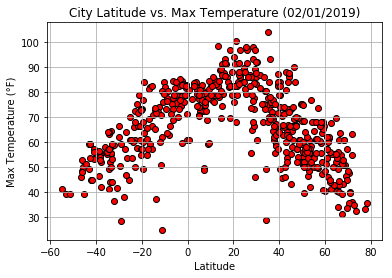

In [9]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], facecolors="red", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Max Temperature (02/01/2019)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()

#### Latitude vs. Humidity Plot

In [ ]:
# Build Scatter Plot for Each Data Type
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], facecolors="red", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Max Temperature (02/01/2019)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("City_Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()

#### Latitude vs. Cloudiness Plot

In [ ]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Cloudiness (02/01/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:

# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], facecolors="yellow", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Wind Speed (02/01/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Wind_Speed.png")

# Show Plot
plt.show()